In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
# df=pokemon[["height",'weight',"base_experience","hp","attack","defense","speed","special-attack","special-defense"]]
print(pokemon.head())
pokemon['generation_id'].value_counts()

   id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65  


generation_id
5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: count, dtype: int64

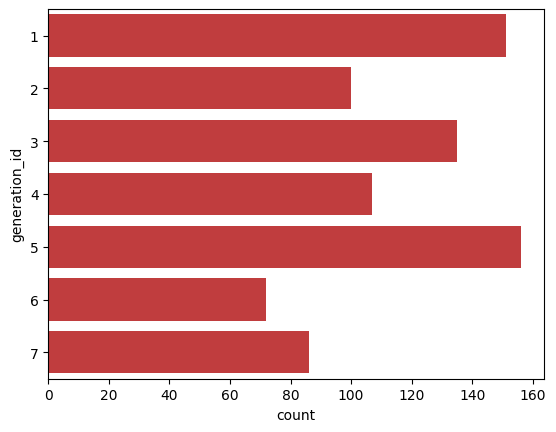

In [13]:
# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=pokemon, y='generation_id',palette=sb.color_palette()[4]);

In [10]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

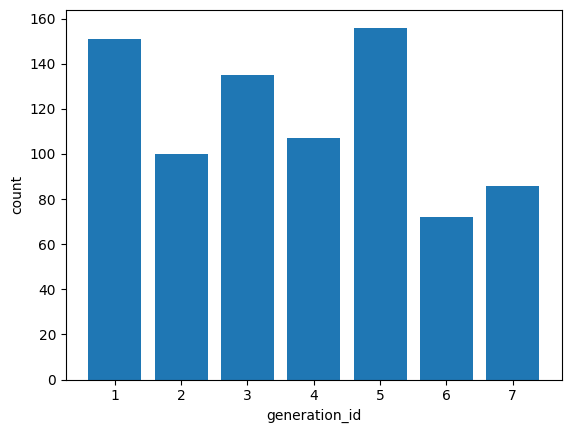

In [16]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

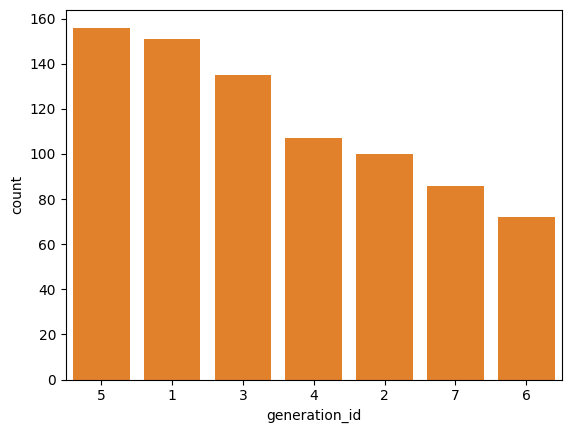

In [20]:
# Static-ordering the bars
sb.countplot(data=pokemon, x='generation_id', order=[5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', order=gen_order);


In [22]:
pokemon['generation_id'].value_counts().index

Index([5, 1, 3, 4, 2, 7, 6], dtype='int64', name='generation_id')

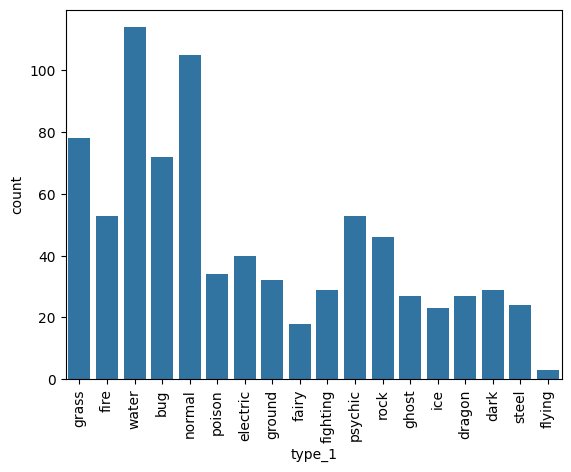

In [25]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1',);
plt.xticks(rotation=90);

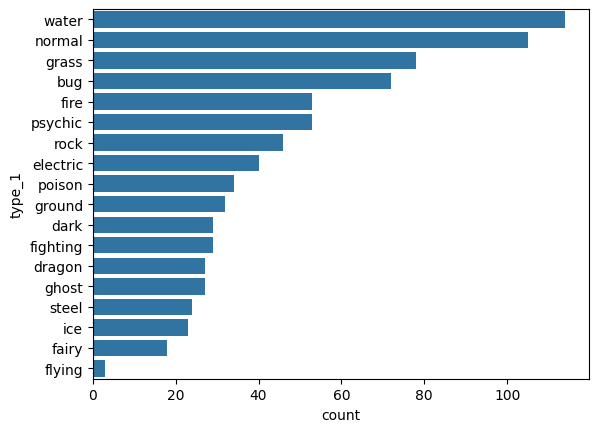

In [26]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', order=type_order);

In [27]:
pokemon.melt??

Signature:
pokemon.melt(
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name: 'Hashable' = 'value',
    col_level: 'Level | None' = None,
    ignore_index: 'bool' = True,
) -> 'DataFrame'
Docstring:
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

Parameters
----------
id_vars : scalar, tuple, list, or ndarray, optional
    Column(s) to use as identifier variables.
value_vars : scalar, tuple, list, or ndarray, optional
    Column(s) to unpivot. If not specified, uses all columns that
    are not set as `id_vars`.
var_name : scalar, default None
    Name to use for the 'variable' column. If None it uses
    ``frame.columns.name`` or 'variable'

In [28]:
pokemon.shape

(807, 14)

In [29]:
pkmn_types = pokemon.melt(['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')

In [30]:
pkmn_types.shape

(1614, 4)

In [33]:
pkmn_types[pkmn_types['species']=='bulbasaur']

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
807,1,bulbasaur,type_2,poison


In [35]:
pokemon[pokemon['species']=='bulbasaur']

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65


In [36]:
pkmn_types[pkmn_types['type']=='grass']

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
42,43,oddish,type_1,grass
43,44,gloom,type_1,grass
...,...,...,...,...
1514,708,phantump,type_2,grass
1515,709,trevenant,type_2,grass
1516,710,pumpkaboo,type_2,grass
1517,711,gourgeist,type_2,grass


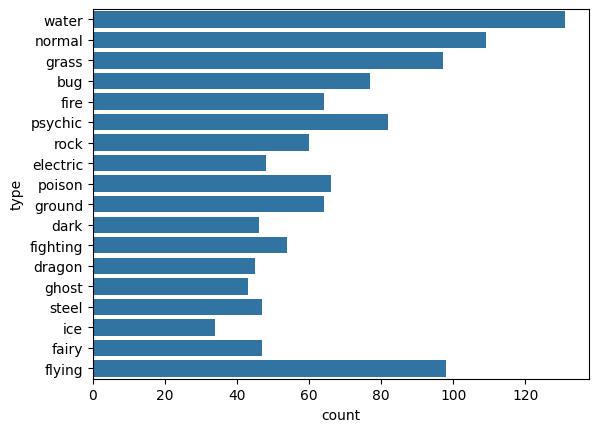

In [55]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

In [76]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

C:\Users\HP Zbook Fury 15 G7\AppData\Local\Temp\ipykernel_8368\1667256291.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = type_counts[i]


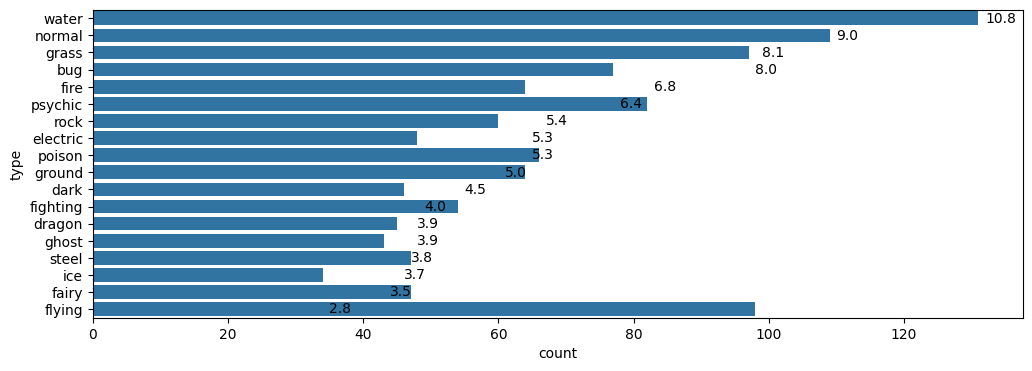

In [77]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
type_counts = pkmn_types['type'].value_counts()
n_pokemon = pkmn_types['type'].value_counts().sum()
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

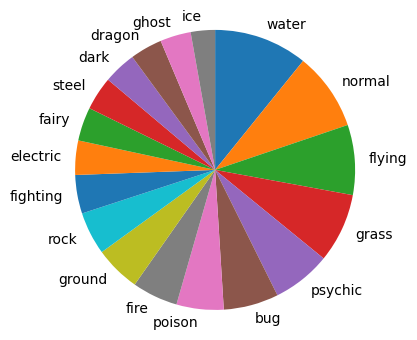

In [78]:
# Use the same pokemon dataset
sorted_counts = pkmn_types['type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square');

In [60]:
n_pokemon

np.int64(1212)

In [64]:
pokemon['type_1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [65]:
pokemon['type_2'].unique()

array(['poison', nan, 'flying', 'ground', 'fairy', 'grass', 'fighting',
       'psychic', 'steel', 'ice', 'rock', 'water', 'electric', 'fire',
       'dragon', 'dark', 'ghost', 'bug', 'normal'], dtype=object)

In [66]:
pkmn_types['type'].value_counts()

type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: count, dtype: int64

In [67]:
pkmn_types['type'].isnull().sum()

np.int64(402)

In [70]:
pkmn_types.sort_values('species').shape

(1614, 4)